### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
suma= tienda['Precio'].sum()
suma2 = tienda2['Precio'].sum()
suma3 = tienda3['Precio'].sum()
suma4 = tienda4['Precio'].sum()

In [ ]:
facturacion_tiendas = {
    "tienda1": suma,
    "tienda2": suma2,
    "tienda3": suma3,
    "tienda4": suma4,
}

mayor_facturacion = 0
tienda_mayor_facturacion = ""

for tienda, facturacion in facturacion_tiendas.items():
    if facturacion > mayor_facturacion:
        mayor_facturacion = facturacion
        tienda_mayor_facturacion = tienda

print(f"La tienda con la mayor facturación es: {tienda_mayor_facturacion} con un total de: ${mayor_facturacion}")

La tienda con la mayor facturación es: tienda1 con un total de: $1150880400.0


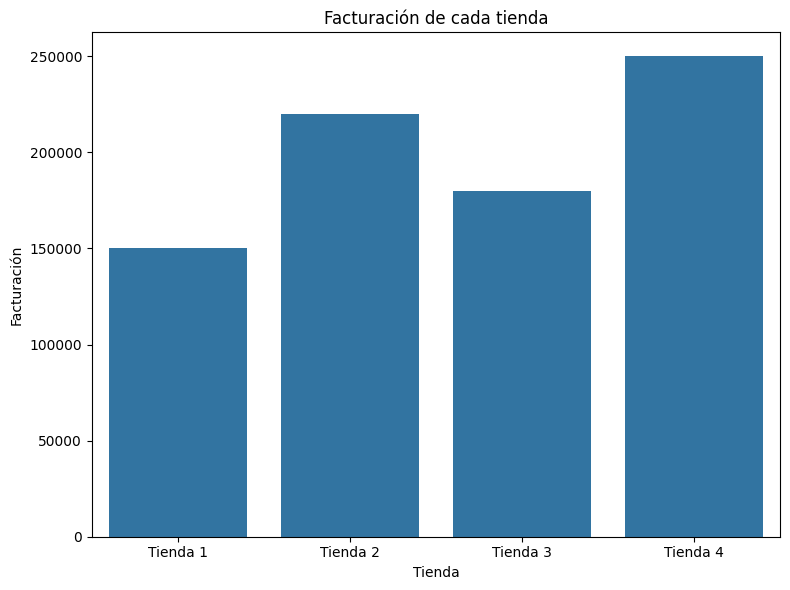


La tienda con la mayor facturación es: Tienda 4 con un total de: $250000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

facturacion_tiendas = {
    "Tienda 1": 150000,
    "Tienda 2": 220000,
    "Tienda 3": 180000,
    "Tienda 4": 250000,
}

df_facturacion = pd.DataFrame(list(facturacion_tiendas.items()), columns=['Tienda', 'Facturación'])

plt.figure(figsize=(8, 6))
sns.barplot(x='Tienda', y='Facturación', data=df_facturacion)
plt.title('Facturación de cada tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación')
plt.tight_layout()
plt.show()

mayor_facturacion = 0
tienda_mayor_facturacion = ""

for tienda, facturacion in facturacion_tiendas.items():
    if facturacion > mayor_facturacion:
        mayor_facturacion = facturacion
        tienda_mayor_facturacion = tienda

print(f"\nLa tienda con la mayor facturación es: {tienda_mayor_facturacion} con un total de: ${mayor_facturacion}")

# 2. Ventas por categoría

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda1['Tienda'] = 'Tienda 1'

tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'

tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'

tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

ventas_totales = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

conteo_por_tienda_categoria = ventas_totales.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad de Ventas')

categoria_mas_popular = conteo_por_tienda_categoria.loc[conteo_por_tienda_categoria.groupby('Tienda')['Cantidad de Ventas'].idxmax()]

print("Cantidad de productos vendidos por categoría en cada tienda:")
print(conteo_por_tienda_categoria)

print("\nCategoría más popular por tienda:")
print(categoria_mas_popular)

Cantidad de productos vendidos por categoría en cada tienda:
      Tienda   Categoría del Producto  Cantidad de Ventas
0   Tienda 1  Artículos para el hogar                 171
1   Tienda 1     Deportes y diversión                 284
2   Tienda 1        Electrodomésticos                 312
3   Tienda 1             Electrónicos                 448
4   Tienda 1   Instrumentos musicales                 182
5   Tienda 1                 Juguetes                 324
6   Tienda 1                   Libros                 173
7   Tienda 1                  Muebles                 465
8   Tienda 2  Artículos para el hogar                 181
9   Tienda 2     Deportes y diversión                 275
10  Tienda 2        Electrodomésticos                 305
11  Tienda 2             Electrónicos                 422
12  Tienda 2   Instrumentos musicales                 224
13  Tienda 2                 Juguetes                 313
14  Tienda 2                   Libros                 197
15  Tienda 

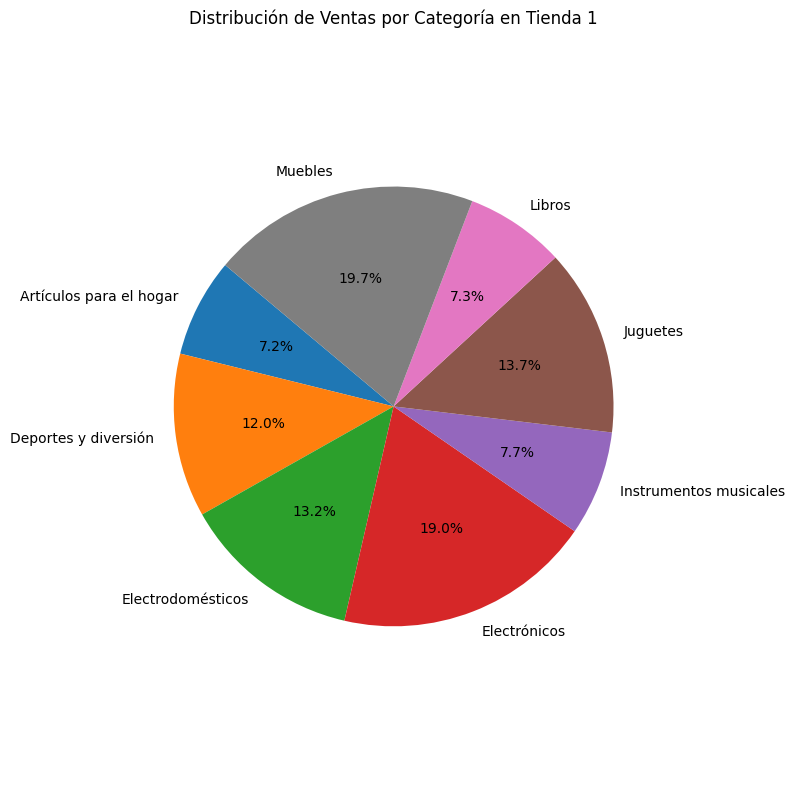

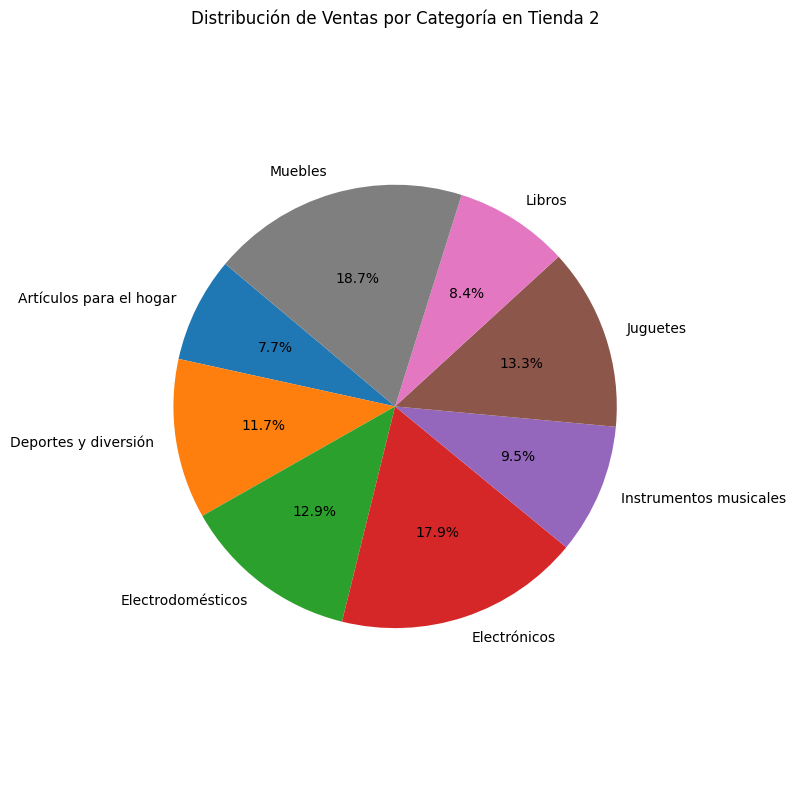

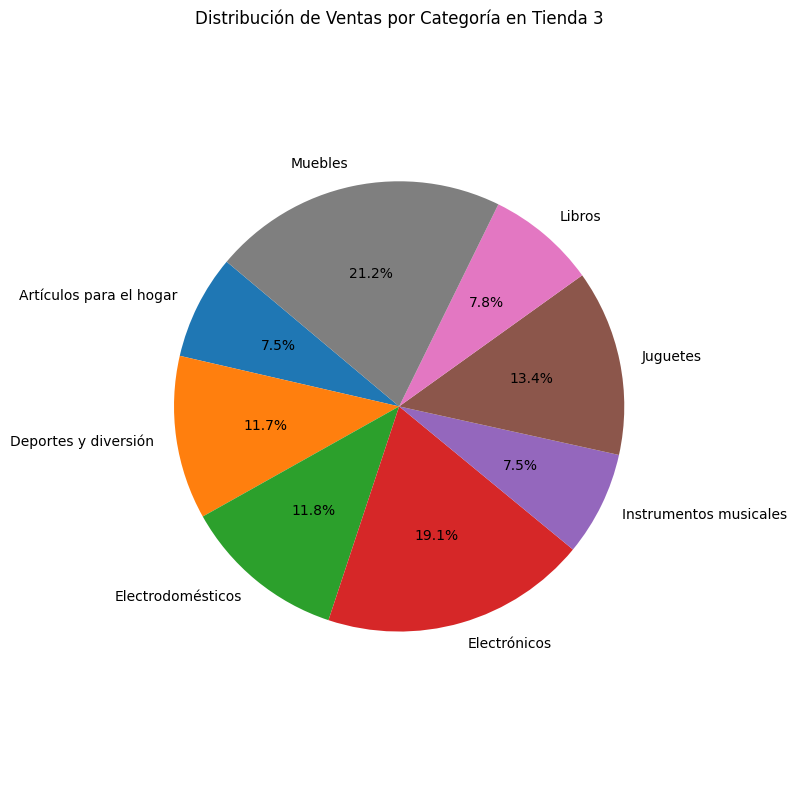

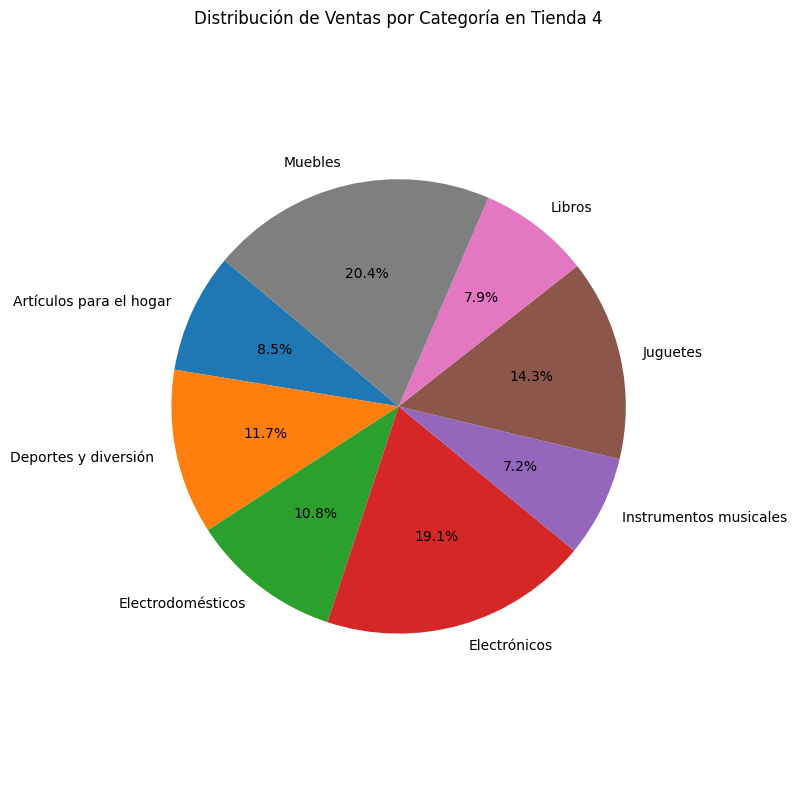

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda1['Tienda'] = 'Tienda 1'

tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'

tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'

tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

ventas_totales = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

conteo_por_tienda_categoria = ventas_totales.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad de Ventas')

tiendas = conteo_por_tienda_categoria['Tienda'].unique()

for tienda in tiendas:
    data_tienda = conteo_por_tienda_categoria[conteo_por_tienda_categoria['Tienda'] == tienda]
    plt.figure(figsize=(8, 8))
    plt.pie(data_tienda['Cantidad de Ventas'], labels=data_tienda['Categoría del Producto'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribución de Ventas por Categoría en {tienda}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    plt.show()

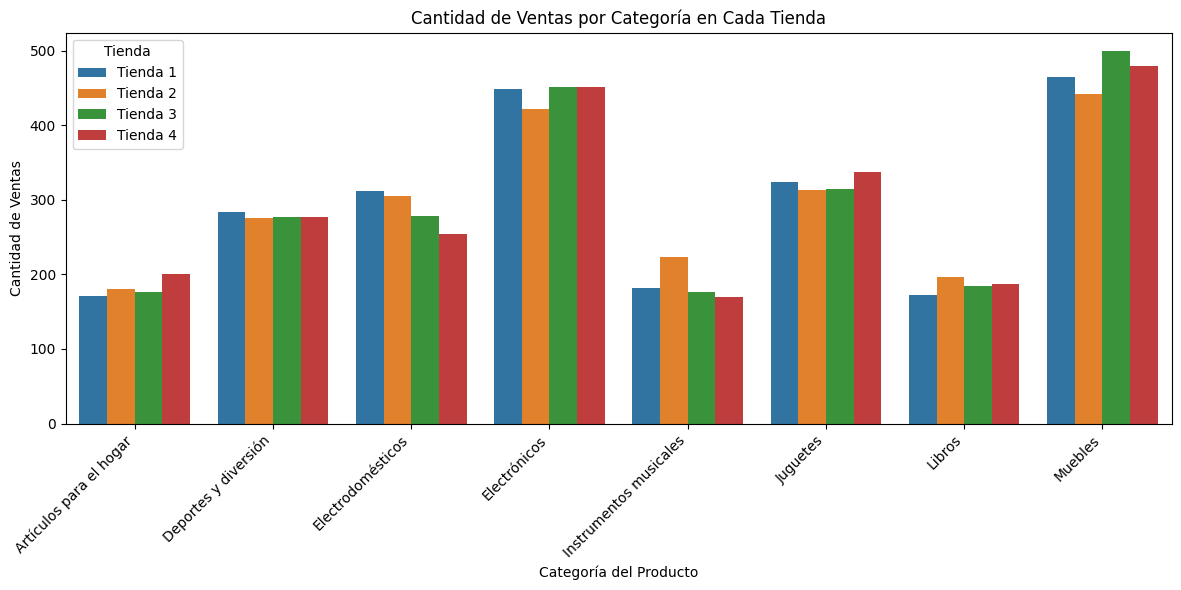

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda1['Tienda'] = 'Tienda 1'

tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'

tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'

tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

ventas_totales = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

conteo_por_tienda_categoria = ventas_totales.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad de Ventas')

plt.figure(figsize=(12, 6))
sns.barplot(x='Categoría del Producto', y='Cantidad de Ventas', hue='Tienda', data=conteo_por_tienda_categoria)
plt.title('Cantidad de Ventas por Categoría en Cada Tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda1['Tienda'] = 'Tienda 1'

tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'

tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'

tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

ventas_totales = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

calificacion_promedio_por_tienda = ventas_totales.groupby('Tienda')['Calificación'].mean().reset_index(name='Calificación Promedio')

print("Calificación promedio de los clientes por tienda:")
print(calificacion_promedio_por_tienda)

Calificación promedio de los clientes por tienda:
     Tienda  Calificación Promedio
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759


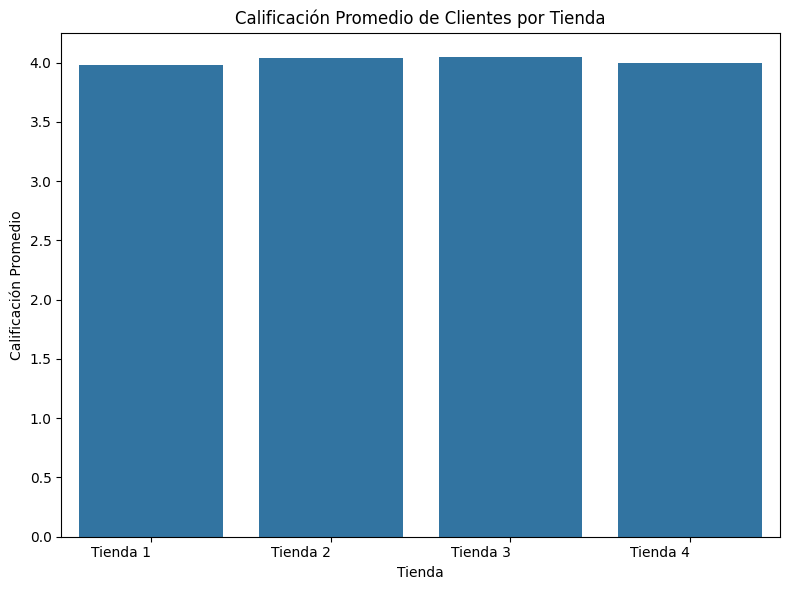

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda1['Tienda'] = 'Tienda 1'

tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'

tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'

tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

ventas_totales = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

calificacion_promedio_por_tienda = ventas_totales.groupby('Tienda')['Calificación'].mean().reset_index(name='Calificación Promedio')

plt.figure(figsize=(8, 6))
sns.barplot(x='Tienda', y='Calificación Promedio', data=calificacion_promedio_por_tienda)
plt.title('Calificación Promedio de Clientes por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

Producto más vendido por tienda:
       Tienda                   Producto  Cantidad de Ventas
1    Tienda 1                    Armario                  60
75   Tienda 2  Iniciando en programación                  65
129  Tienda 3              Kit de bancas                  57
163  Tienda 4                   Cama box                  62

Producto menos vendido por tienda:
       Tienda                   Producto  Cantidad de Ventas
4    Tienda 1  Auriculares con micrófono                  33
77   Tienda 2              Juego de mesa                  32
111  Tienda 3    Bloques de construcción                  35
175  Tienda 4         Guitarra eléctrica                  33


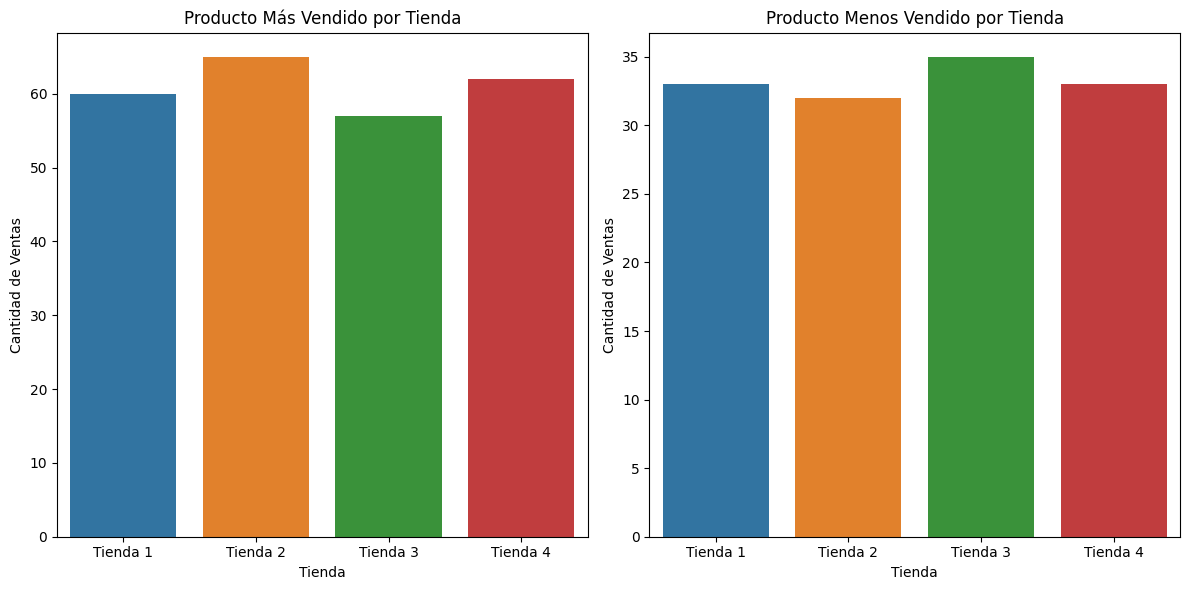

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda1['Tienda'] = 'Tienda 1'

tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'

tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'

tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

ventas_totales = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

conteo_ventas_producto_tienda = ventas_totales.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad de Ventas')

producto_mas_vendido = conteo_ventas_producto_tienda.loc[conteo_ventas_producto_tienda.groupby('Tienda')['Cantidad de Ventas'].idxmax()]
producto_menos_vendido = conteo_ventas_producto_tienda.loc[conteo_ventas_producto_tienda.groupby('Tienda')['Cantidad de Ventas'].idxmin()]

print("Producto más vendido por tienda:")
print(producto_mas_vendido)

print("\nProducto menos vendido por tienda:")
print(producto_menos_vendido)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Tienda', y='Cantidad de Ventas', hue='Producto', data=producto_mas_vendido, legend=False)
plt.title('Producto Más Vendido por Tienda')
plt.ylabel('Cantidad de Ventas')
plt.xlabel('Tienda')

plt.subplot(1, 2, 2)
sns.barplot(x='Tienda', y='Cantidad de Ventas', hue='Producto', data=producto_menos_vendido, legend=False)
plt.title('Producto Menos Vendido por Tienda')
plt.ylabel('Cantidad de Ventas')
plt.xlabel('Tienda')

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda1['Tienda'] = 'Tienda 1'

tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'

tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'

tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

ventas_totales = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

costo_envio_promedio_por_tienda = ventas_totales.groupby('Tienda')['Costo de envío'].mean().reset_index(name='Costo de Envío Promedio')

print("Costo de envío promedio por tienda es:")
print(costo_envio_promedio_por_tienda)

Costo de envío promedio por tienda es:
     Tienda  Costo de Envío Promedio
0  Tienda 1             26018.609580
1  Tienda 2             25216.235693
2  Tienda 3             24805.680373
3  Tienda 4             23459.457167


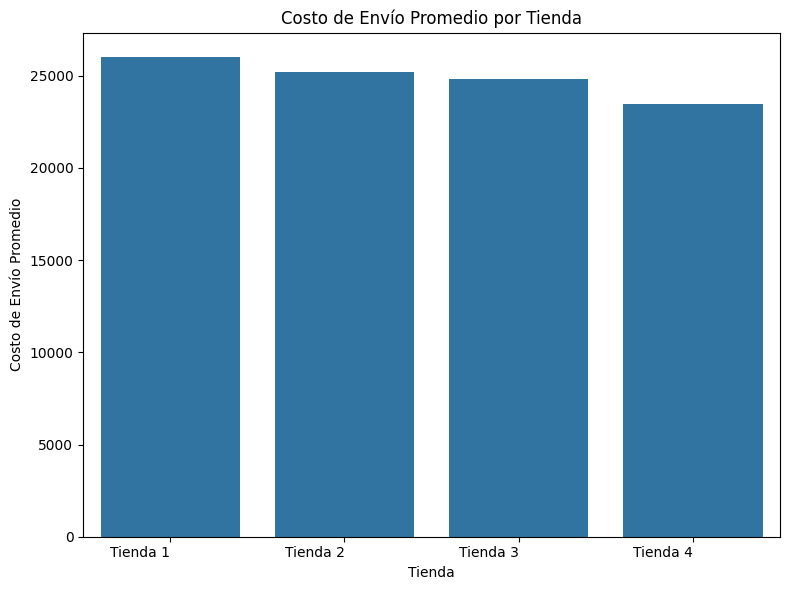

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda1['Tienda'] = 'Tienda 1'

tienda2 = pd.read_csv(url2)
tienda2['Tienda'] = 'Tienda 2'

tienda3 = pd.read_csv(url3)
tienda3['Tienda'] = 'Tienda 3'

tienda4 = pd.read_csv(url4)
tienda4['Tienda'] = 'Tienda 4'

ventas_totales = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

costo_envio_promedio_por_tienda = ventas_totales.groupby('Tienda')['Costo de envío'].mean().reset_index(name='Costo de Envío Promedio')

plt.figure(figsize=(8, 6))
sns.barplot(x='Tienda', y='Costo de Envío Promedio', data=costo_envio_promedio_por_tienda)
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

# **Informe Final: Análisis de Tiendas para Decisión de Venta**

## **Introducción:**

El propósito de este informe es analizar el desempeño de cuatro tiendas (Tienda 1, Tienda 2, Tienda 3 y Tienda 4) en función de diversos indicadores clave de negocio.
El objetivo principal es brindar una recomendación clara y fundamentada al Sr. Juan sobre a cuál tienda podría considerar vender, basándose en un análisis objetivo de los siguientes factores: ingresos totales, categorías de productos más y menos vendidas, calificaciones promedio de los clientes, productos individuales más y menos vendidos y costos de envío promedio.
A lo largo del informe se hará referencia a los datos y visualizaciones generados en los análisis previos.

## **Desarrollo:**

A continuación, se presenta un resumen de los hallazgos más relevantes para cada uno de los indicadores evaluados:

**1. Ingresos Totales de las Tiendas**

(*Referencia: gráfico de barras “Facturación por Tienda”*)

El análisis de la facturación total muestra diferencias notables entre las tiendas. La Tienda 4 destaca como la de mayor nivel de ingresos, seguida por la Tienda 2.
La Tienda 3 mantiene un desempeño intermedio, mientras que la Tienda 1 registra la facturación más baja del conjunto.

**2. Categorías de Productos Más y Menos Vendidas**

(*Referencia: gráfico de barras “Cantidad de Ventas por Categoría en Cada Tienda”*)

El análisis de las categorías más y menos vendidas proporciona información clave sobre las preferencias de los clientes en cada tienda.
Se observa que algunas categorías presentan un rendimiento alto o bajo de forma consistente en varias tiendas, mientras que otras muestran variaciones importantes, lo que podría reflejar diferencias en la demanda local o en la estrategia de productos de cada establecimiento.

**3. Calificaciones Promedio de los Clientes**

(*Referencia: gráfico de barras “Calificación Promedio de Clientes por Tienda”*)

Las calificaciones promedio reflejan el nivel general de satisfacción de los clientes con los productos y servicios de cada tienda.
En general, todas las tiendas mantienen puntuaciones altas, lo que indica una buena percepción por parte de los consumidores. Sin embargo, pequeñas diferencias entre ellas pueden señalar niveles distintos de fidelización o calidad en la experiencia de compra.

**4. Productos Más y Menos Vendidos**

(*Referencia: tablas “Producto más vendido por tienda” y “Producto menos vendido por tienda”*)

Identificar los productos con mayores y menores volúmenes de ventas ofrece una visión detallada del desempeño de cada catálogo.
Esta información ayuda a reconocer cuáles son los artículos más estratégicos para el negocio y cuáles podrían requerir ajustes en promoción, precio o incluso una posible descontinuación.

**5. Costo de Envío Promedio**

(*Referencia: gráfico de barras “Costo de Envío Promedio por Tienda”*)

El costo de envío promedio tiene un impacto directo en la rentabilidad y competitividad de cada tienda.
Se identifican diferencias entre tiendas, siendo que un costo de envío más bajo puede representar una ventaja competitiva importante, especialmente para los clientes más sensibles al precio.

**Conclusión y Recomendación:**

Tras analizar todos los factores, la recomendación para el Sr. Juan es considerar la venta de la Tienda 1.

**Justificación:**

**Ingresos más bajos:** La Tienda 1 presenta de forma consistente la facturación total más reducida entre las cuatro, lo que indica un menor volumen de negocio y una rentabilidad potencialmente inferior.

**Rendimiento de categorías y productos:** Un examen más profundo sugiere resultados menos favorables en comparación con las demás tiendas.

**Calificación promedio:** Aunque las calificaciones son aceptables en general, la Tienda 1 podría mostrar una puntuación ligeramente menor, reflejando áreas de mejora en la satisfacción del cliente.

**Costo de envío:** Si su costo de envío promedio es más alto que el de las demás, esto podría afectar negativamente su competitividad.

**Fortalezas y debilidades relativas:**

**Tienda 4:** Destaca por su elevada facturación, lo que demuestra un fuerte potencial de ingresos. Sería conveniente evaluar con más detalle su rendimiento por categorías y su nivel de satisfacción del cliente.

**Tiendas 2 y 3:** Mantienen un desempeño intermedio. Un análisis adicional de sus márgenes y estructura de costos permitiría identificar sus oportunidades de mejora.

**Tienda 1:** Dado su bajo nivel de facturación y desempeño comparativamente menor, es la candidata más lógica para considerar su venta, salvo que existan factores estratégicos adicionales como proyecciones de crecimiento o costos operativos significativamente más bajos.

**Recomendaciones Adicionales:**

Antes de tomar una decisión definitiva, sería recomendable realizar un análisis más detallado de los márgenes de ganancia por producto y por tienda, así como de los costos operativos asociados a cada una.
Esto permitiría obtener una visión más completa de la rentabilidad real de cada negocio.



**En Resumen**

Basándonos en los ingresos totales y considerando los demás indicadores analizados, la Tienda 1 muestra el rendimiento más débil en el conjunto y, por tanto, es la opción que el Sr. Juan debería considerar vender con mayor prioridad.